**What will be the predicted score if a student studies for 9.25 hours a day?**

**Importing the Liabraries-**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

**Reading the Data-**

In [2]:
dataset = pd.read_csv("https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv")
dataset.head(2)

,Hours,Scores
0,2.5,21
1,5.1,47


In [3]:
print(dataset.shape)
print(dataset.columns)

(25, 2)
Index(['Hours', 'Scores'], dtype='object')


In [4]:
dataset.isna().sum()# this will show the null values in dataset if present.

Hours     0
Scores    0
dtype: int64

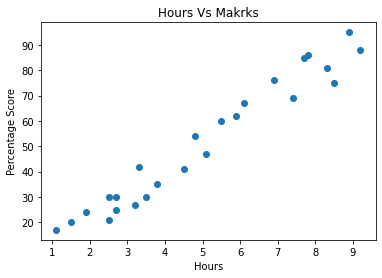

In [5]:
#Score Distribution Plot
plt.scatter(dataset['Hours'], dataset['Scores'])
plt.title("Hours Vs Makrks")
plt.xlabel("Hours")
plt.ylabel("Percentage Score")
plt.show()

Above graph, clearly shows the positive relation between the number of Hours and percentage score.

**Preparing The Data-**

In [6]:
x = dataset.iloc[:,:-1].values
x

array([[2.5],
       [5.1],
       [3.2],
       [8.5],
       [3.5],
       [1.5],
       [9.2],
       [5.5],
       [8.3],
       [2.7],
       [7.7],
       [5.9],
       [4.5],
       [3.3],
       [1.1],
       [8.9],
       [2.5],
       [1.9],
       [6.1],
       [7.4],
       [2.7],
       [4.8],
       [3.8],
       [6.9],
       [7.8]])

In [7]:
y = dataset.iloc[:,-1].values
y

array([21, 47, 27, 75, 30, 20, 88, 60, 81, 25, 85, 62, 41, 42, 17, 95, 30,
       24, 67, 69, 30, 54, 35, 76, 86], dtype=int64)

In [8]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 0)

**Training the Algorithm-**

In [9]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [10]:
line = model.coef_ * x + model.intercept_

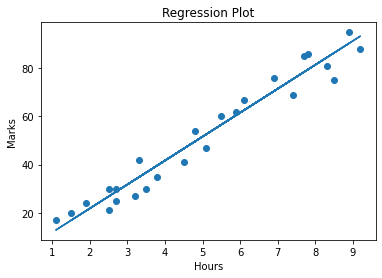

In [11]:
#Regression Plot
plt.plot(x, line)
plt.scatter(dataset['Hours'], dataset['Scores'])
plt.title("Regression Plot")
plt.xlabel("Hours")
plt.ylabel("Marks")
plt.show()

**Making Predictions-**

In [12]:
pred = model.predict(x_test)
pred

array([16.84472176, 33.74557494, 75.50062397, 26.7864001 , 60.58810646,
       39.71058194, 20.8213931 ])

In [13]:
data = pd.DataFrame({'Actual': y_test, 'Predicted': pred})

In [14]:
data.head(2)

,Actual,Predicted
0,20,16.844722
1,27,33.745575


In [15]:
#prediction of score if student studies for 9.25 Hours a day
hours =[[9.25]]
pred_val = model.predict(hours)
print('Number of total hours : {}'.format(hours))
print('Predicted Score : {}'.format(pred_val[0]))

Number of total hours : [[9.25]]
Predicted Score : 93.89272889341655


**The Predicted score of a student who studies for 9.25 hrs/day is 93.8927.**

**Evaluation of the Model-**

In [16]:
#Mean Absolute Error
from sklearn.metrics import mean_absolute_error, accuracy_score
print("Mean Aboslute Error: ", mean_absolute_error(y_test, pred))


Mean Aboslute Error:  4.130879918502486
